#### Nota inicial 

Para que todas las imágenes se puedan observar y analizar en este código deben estar en la sección de archivos de este google colab

#### Importación del código 

In [ ]:
import cv2
from cv2 import WINDOW_NORMAL
from google.colab.patches import cv2_imshow
import numpy as np 
from matplotlib import pyplot as plt 
from skimage import exposure
from skimage import io
from skimage.exposure import is_low_contrast

#### Analisis de figuras 05-10b y 05-10c en escala de grises 

Importación de Figura 05-10b

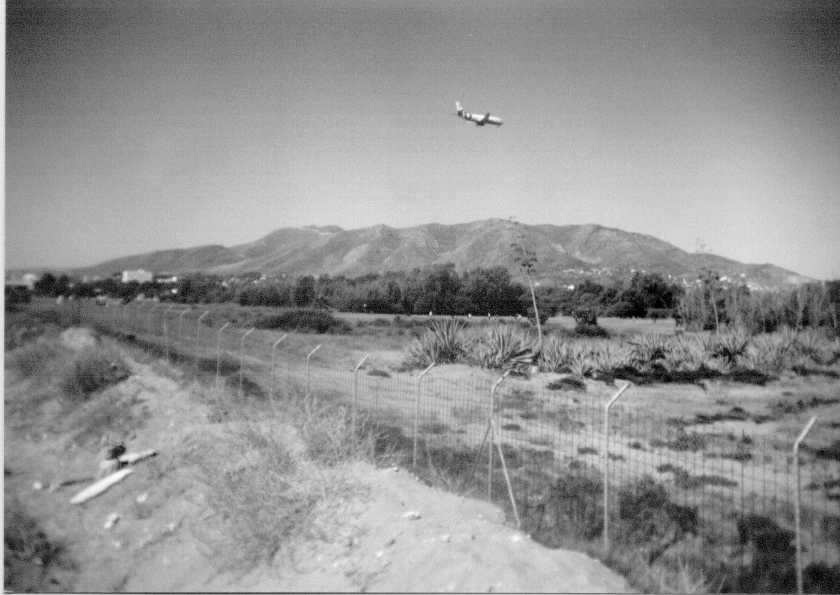

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/figura-05-10b.jpg', cv2.IMREAD_GRAYSCALE) # importación de figura 
cv2_imshow(img) # mostrar la figura 

Text(0, 0.5, 'cantidad de pixeles')

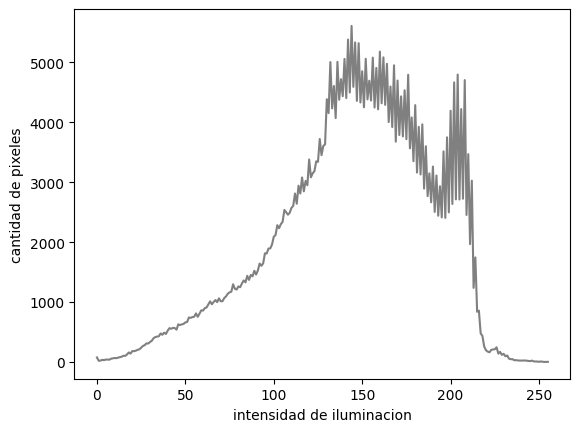

In [ ]:
# histograma 1
hist1 = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist1, color='gray')
plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')

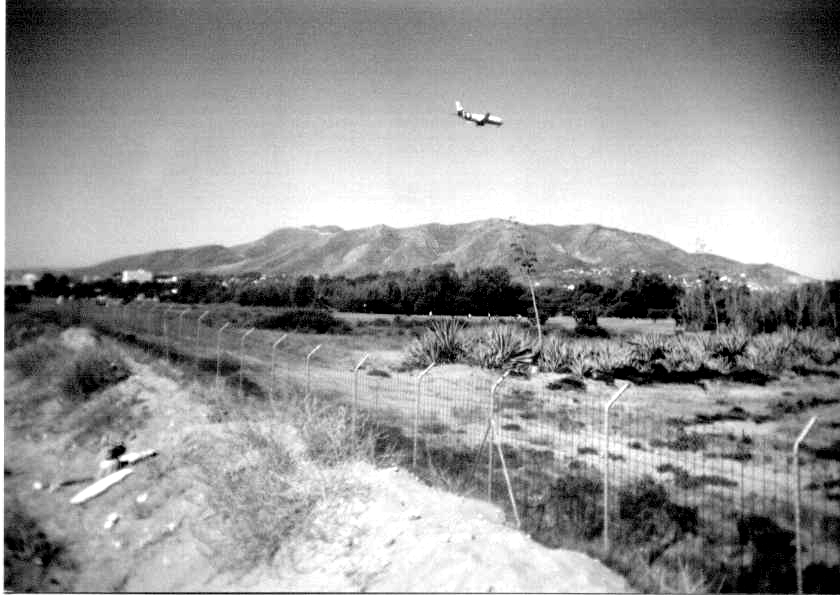

Contraste original 0.62109375
Contraste procesada 0.99609375


In [ ]:
# Estiramiento de contraste (Mejor rango dinámico)
p3, p97 = np.percentile(img, (3,97))
img_rescale = exposure.rescale_intensity(img, in_range=(p3,p97))
cv2_imshow(img_rescale)
p2_3, p2_97 = np.percentile(img_rescale, (3,97))
print("Contraste original "  + str((p97-p3)/256)) #calculo del contraste de imagen original
print("Contraste procesada "  + str((p2_97-p2_3)/256)) #calculo del contraste de imagen procesada

Comparación de los histogramas de la imagen antes y después de aumentar su rango dinámico

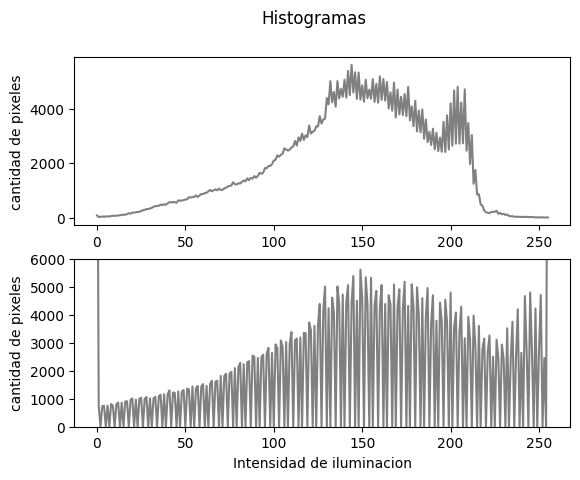

In [ ]:
## Histograma imagen sin procesar.
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Histogramas')

hist1 = cv2.calcHist([img], [0], None, [256], [0, 256])
ax1.plot(hist1, color='gray')
ax1.set_ylabel('cantidad de pixeles')


## Histograma imagen procesada. 
hist2 = cv2.calcHist([img_rescale], [0], None, [256], [0, 256])
ax2.plot(hist2, color='gray')
ax2.set_xlabel('Intensidad de iluminacion')
ax2.set_ylabel('cantidad de pixeles')
ax2.set_ylim(0, 6000)
plt.show()

Análisis de Figura 05-10c

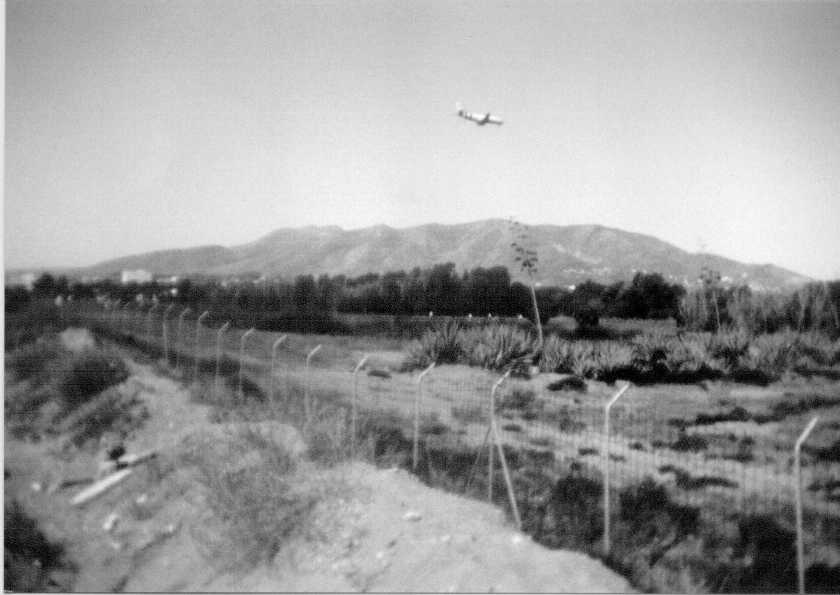

Contraste original 0.8203125


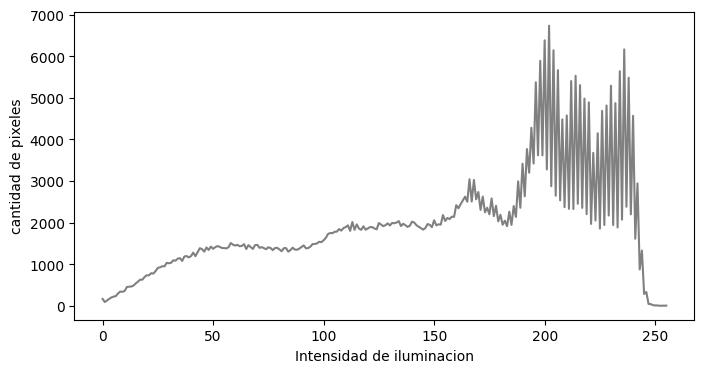

In [ ]:
img2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/figura-05-10c.jpg', cv2.IMREAD_GRAYSCALE) #importación de la imagen
cv2_imshow(img2) # mostrar imagen
p3, p97 = np.percentile(img2, (3,97))
print("Contraste original "  + str((p97-p3)/256)) #calculo del contraste de imagen original

# histograma imagen 2 
hist = cv2.calcHist([img2], [0], None, [256], [0, 256])
plt.figure(figsize=(8,4))
plt.plot(hist, color='gray')
plt.xlabel('Intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.show()

Para realizar un mejor análisis se recortó una parte de la imagen que deebería ser uniforme en su histograma y se analiza su ruido gauseano 

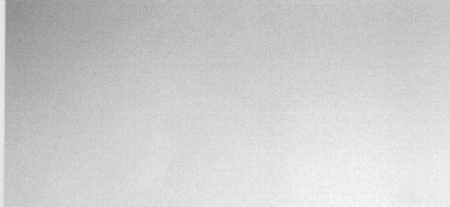

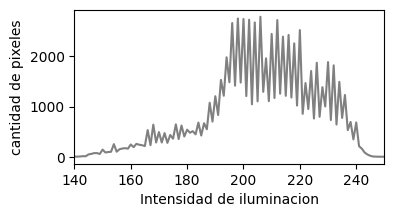

In [ ]:
#importacion de la imagen
# esta imagen fue un recorte manual que se realizó externamente y se agregó a los archivos adjuntos
img2_rec = cv2.imread('/content/drive/MyDrive/Colab Notebooks/figura-05-10c-recorte.jpg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img2_rec)
## histograma de imagen 
hist = cv2.calcHist([img2_rec], [0], None, [256], [0, 256])
plt.figure(figsize=(4,2))
plt.plot(hist, color='gray')
plt.xlabel('Intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')

plt.xlim(140,250)
plt.show()

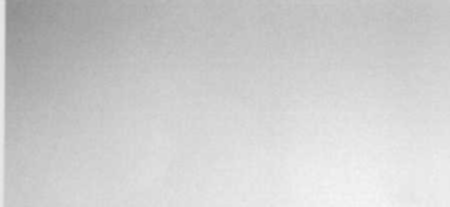

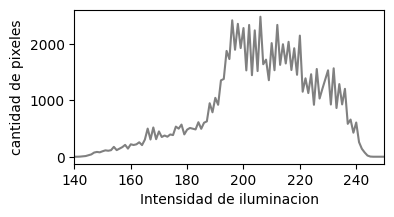

In [ ]:
gaussean_rec = cv2.GaussianBlur(img2_rec, (3,3), 0) #filtro gauseano aplicado a la imagen
cv2_imshow(gaussean_rec)

# histograma de la imagen recortada 
hist = cv2.calcHist([gaussean_rec], [0], None, [256], [0, 256])
plt.figure(figsize=(4,2))
plt.plot(hist, color='gray')
plt.xlabel('Intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.xlim(140,250)
plt.show()

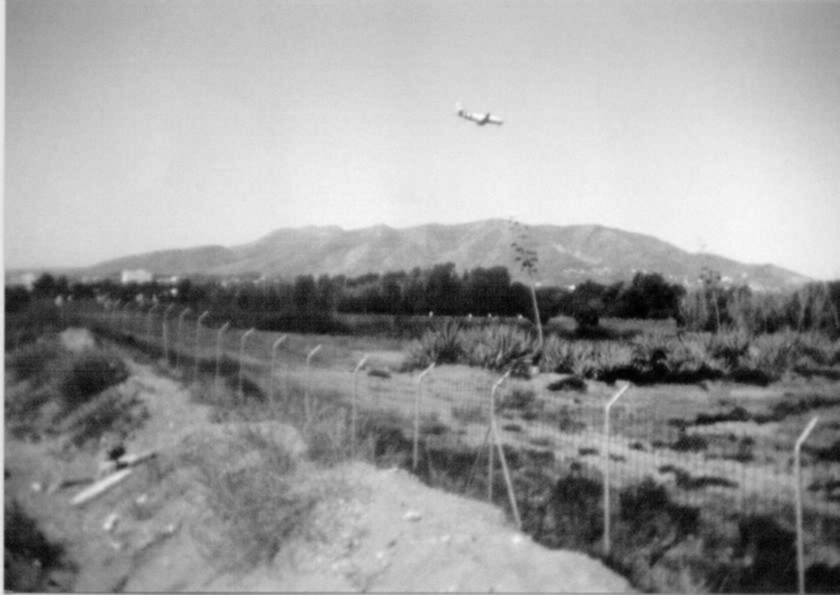

In [ ]:
img2_filtro = cv2.GaussianBlur(img2, (3,3), 0) #filtro gauseano aplicado a la imagen completa
cv2_imshow(img2_filtro) # mostrar imagen final 

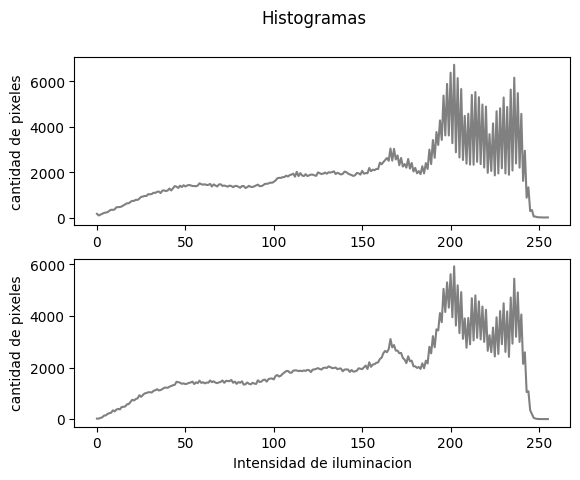

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Histogramas')

# histograma imagen sin procesar
hist1 = cv2.calcHist([img2], [0], None, [256], [0, 256])
ax1.plot(hist1, color='gray')
ax1.set_ylabel('cantidad de pixeles')
# histograma imagen procesada 
hist2 = cv2.calcHist([img2_filtro], [0], None, [256], [0, 256])
ax2.plot(hist2, color='gray')
ax2.set_xlabel('Intensidad de iluminacion')
ax2.set_ylabel('cantidad de pixeles')
plt.show()

#### Análisis de umbralización 

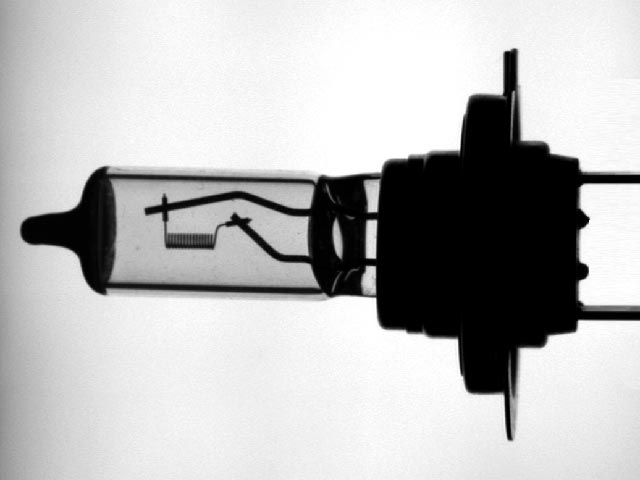

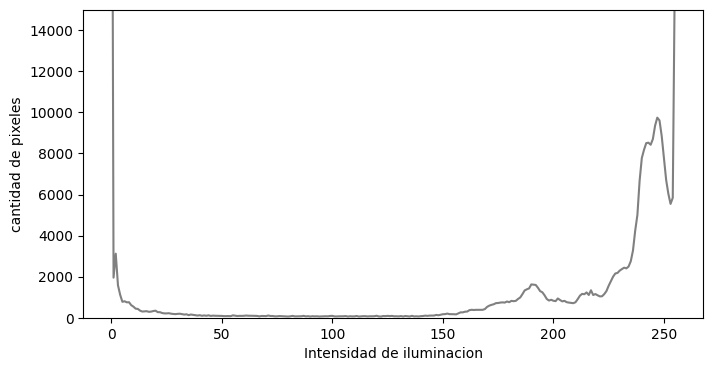

In [ ]:
img_umbral = cv2.imread('/content/drive/MyDrive/Colab Notebooks/halogeno.jpg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img_umbral)

#histograma de la imagen 
hist = cv2.calcHist([img_umbral], [0], None, [256], [0, 256])
plt.figure(figsize=(8,4))
plt.plot(hist, color='gray')
plt.xlabel('Intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.ylim(0,15000)
##plt.xlim(150,256)
plt.show()

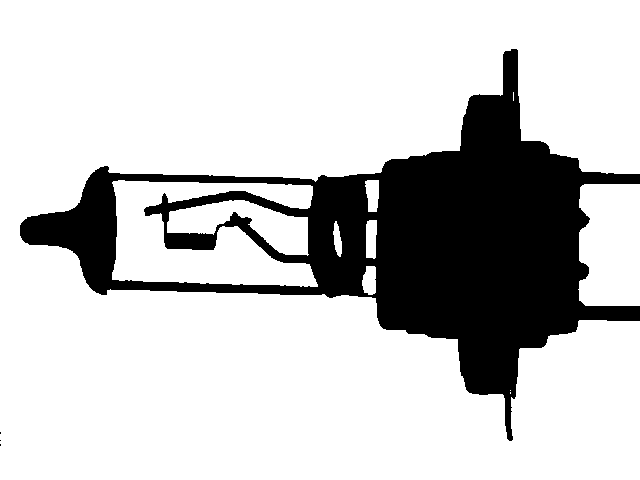

In [ ]:
ret,thresh = cv2.threshold(img_umbral, 140, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)

## umbralización adaptativa

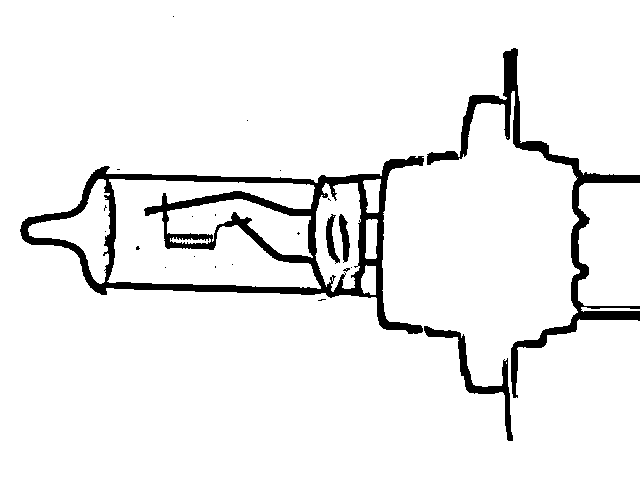

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [ ]:
th1 = cv2.adaptiveThreshold(img_umbral,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 15, 11)
cv2_imshow(th1)

In [ ]:
def binarizacion(imagen, valorUmbral):

  tamaño = np.shape(imagen)
  imgRecreada = np.zeros(tamaño, dtype=int)
  for i in range(0, tamaño[0]):
    for j in range(0, tamaño[1]):
      if (imagen[i][j] < valorUmbral):
        imgRecreada[i][j] = 0
      else:
        imgRecreada[i][j] = 255

  return imgRecreada



(345, 607)


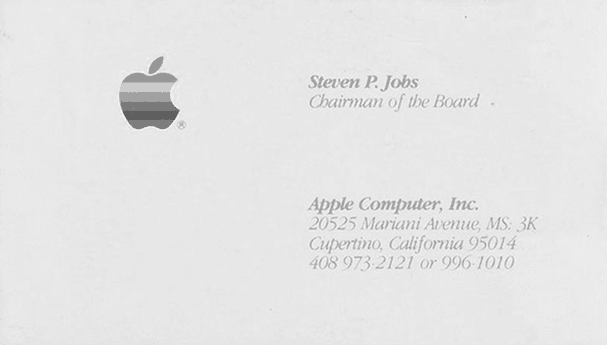

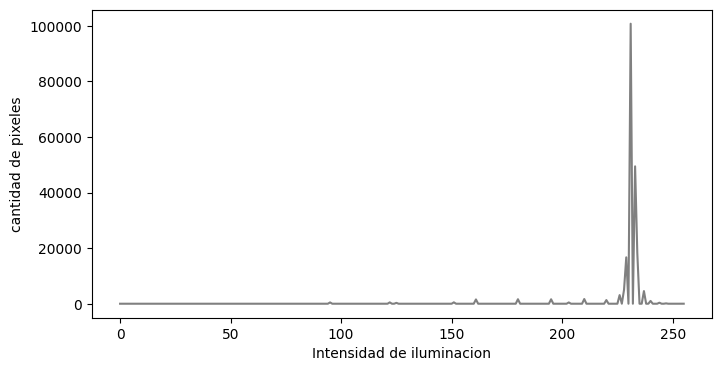

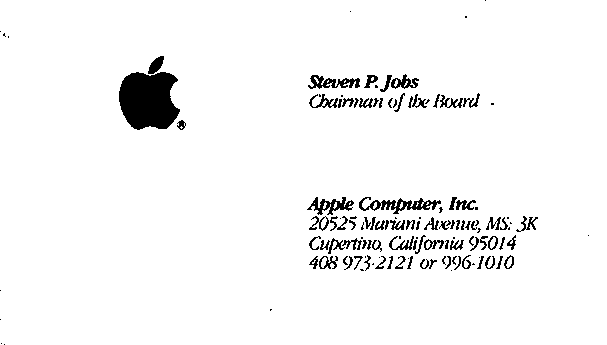

In [ ]:
img_bina = cv2.imread('/content/drive/MyDrive/Colab Notebooks/businesscard.png', cv2.IMREAD_GRAYSCALE)
print(np.shape(img_bina))
cv2_imshow(img_bina)
#histograma de la imagen 
hist = cv2.calcHist([img_bina], [0], None, [256], [0, 256])
plt.figure(figsize=(8,4))
plt.plot(hist, color='gray')
plt.xlabel('Intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.show()

imaRecreada = binarizacion(img_bina, 220)
cv2_imshow(imaRecreada)

#### Ejercicio 4
Extracción de información de una imagen 

In [ ]:
def histograma(imagen_gris):
  #histograma de la imagen 
  hist = cv2.calcHist([imagen_gris], [0], None, [256], [0, 256])
  plt.figure(figsize=(8,4))
  plt.plot(hist, color='gray')
  plt.xlabel('Intensidad de iluminacion')
  plt.ylabel('cantidad de pixeles')
  plt.show()

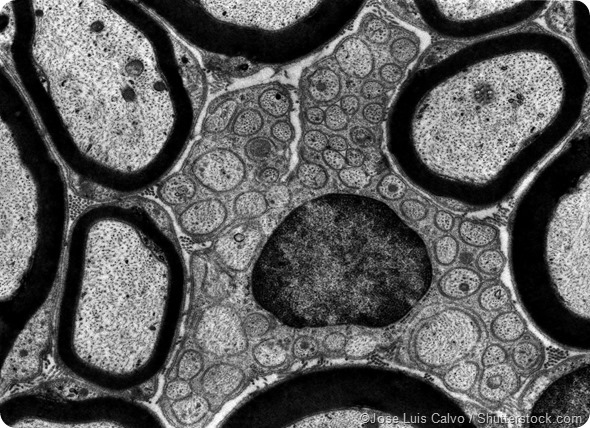

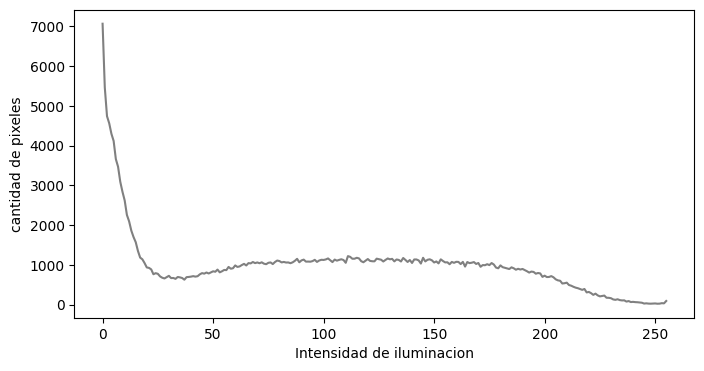

In [ ]:
img_mapa = cv2.imread('/content/MICROSCOPE.jpeg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img_mapa)
histograma(img_mapa)

Filtro altas frecuencias 

In [ ]:
def filtro_pasabajas(ref_image, circle_radius):
    # Obtenemos las dimensiones de la imagen de referencia
    height, width = ref_image.shape[:2]

    # Creamos una imagen en negro con las mismas dimensiones que la imagen de referencia
    black_image = np.zeros((height, width), dtype=np.uint8)

    # Obtenemos el centro de la imagen de referencia
    center = (int(width/2), int(height/2))

    # Dibujamos el círculo blanco en el centro de la imagen negra
    white_image = cv2.circle(black_image, center, circle_radius, (1, 1, 1), thickness=-1)

    return white_image



Filtro bajas frecuencias 

In [ ]:
def filtro_pasaAltas(ref_image, circle_radius):
    # Obtenemos las dimensiones de la imagen de referencia
    height, width = ref_image.shape[:2]

    # Creamos una imagen en blanco con las mismas dimensiones que la imagen de referencia
    white_image = np.ones((height, width), dtype=np.uint8)

    # Obtenemos el centro de la imagen de referencia
    center = (int(width/2), int(height/2))

    # Dibujamos el círculo negro en el centro de la imagen negra
    black_image = cv2.circle(white_image, center, circle_radius, (0, 0, 0), thickness=-1)

    return white_image



funcion para aplicar el filtro de variabilidad o regularidad. Entradas: nombre de la imagen ya en tono de grises (imagen), radio del filtro. 

In [ ]:
def filtro_variabilidad(imagen, radio, tipo_filtro):
  # creación del filtro 
  if (tipo_filtro==0):
    filtro = filtro_pasabajas(imagen, radio)
  elif(tipo_filtro==1):
    filtro = filtro_pasaAltas(imagen, radio)

  # Calcular la transformada de fourier de la imagen 
  ft = np.fft.ifftshift(imagen)
  ft = np.fft.fft2(ft)
  ft = np.fft.fftshift(ft)
  # Mostrar la imagen filtrada
  plt.subplot(121)
  plt.imshow(img_mapa)
  plt.axis("off")
  plt.subplot(122)
  plt.imshow(np.log(abs(ft)))
  plt.axis("off")
  plt.show()

  ## multiplicar el filtro por la transformada
  filtrada = ft * filtro
  plt.imshow(np.log(abs(filtrada)))
  plt.axis("off")
  plt.show()

  # Calculate the inverse Fourier transform of 
  # the Fourier transform
  ift = np.fft.ifftshift(filtrada)
  ift = np.fft.ifft2(ift)
  ift = np.fft.fftshift(ift)
  ift = ift.real  # Toma solo la parte real
  # Normalize the image
  img_normalized = cv2.normalize(ift, None, 0, 1.0,
  cv2.NORM_MINMAX, dtype=cv2.CV_8U)
  plt.imshow(img_normalized)
  plt.axis("off")
  plt.show()

  return ift

Mapas de regularidad

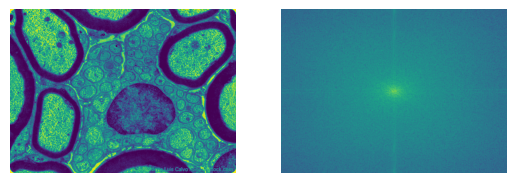

<ipython-input-6-d9659ffa2f88>:23: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(filtrada)))


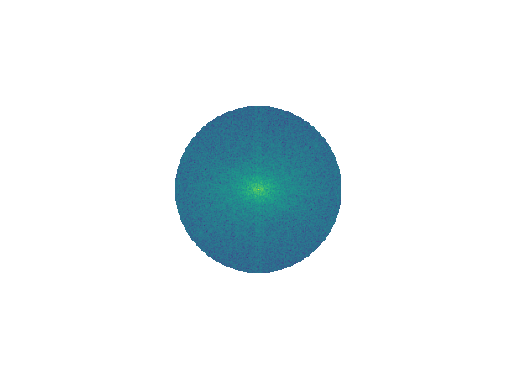

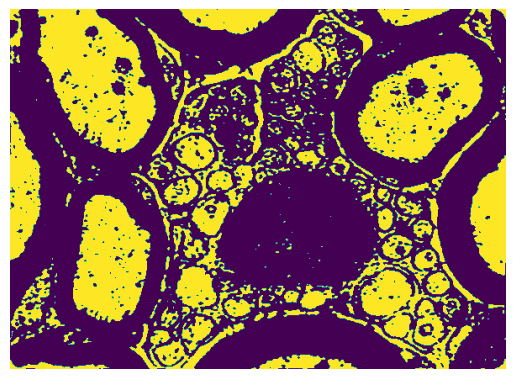

In [ ]:
filtrada = filtro_variabilidad(img_mapa, 100, 0)

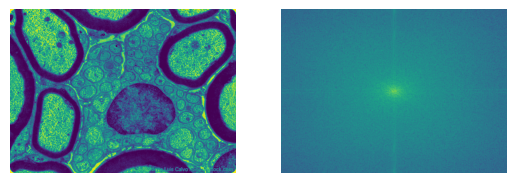

<ipython-input-6-d9659ffa2f88>:23: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(filtrada)))


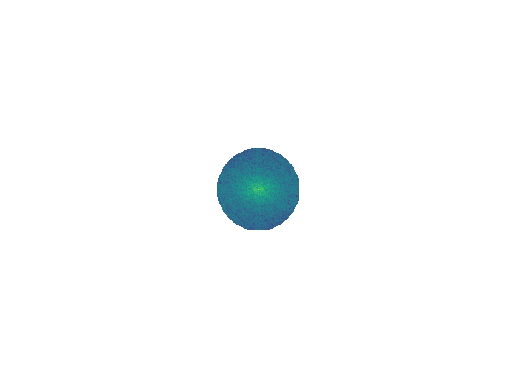

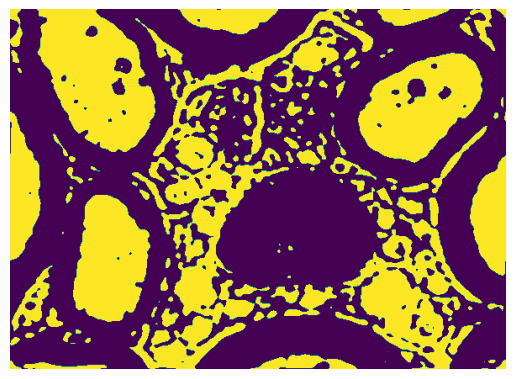

In [ ]:
filtrada = filtro_variabilidad(img_mapa, 50, 0)

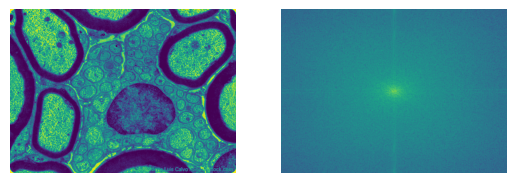

<ipython-input-6-d9659ffa2f88>:23: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(filtrada)))


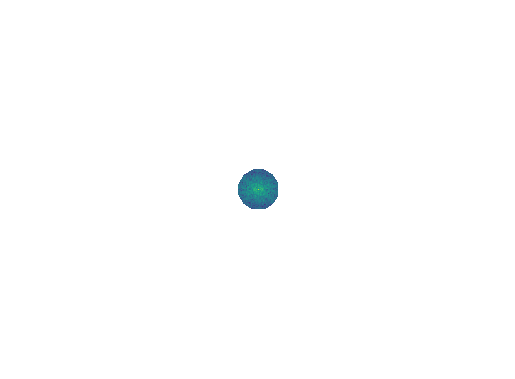

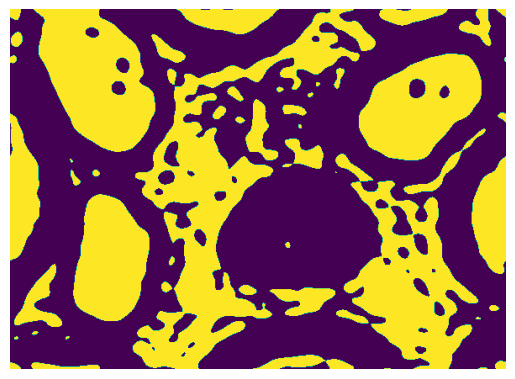

In [ ]:
filtrada = filtro_variabilidad(img_mapa, 25, 0)

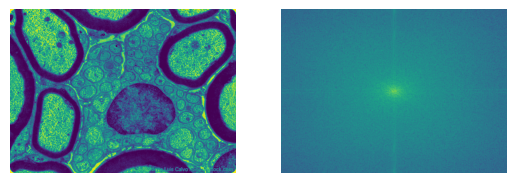

<ipython-input-6-d9659ffa2f88>:23: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(filtrada)))


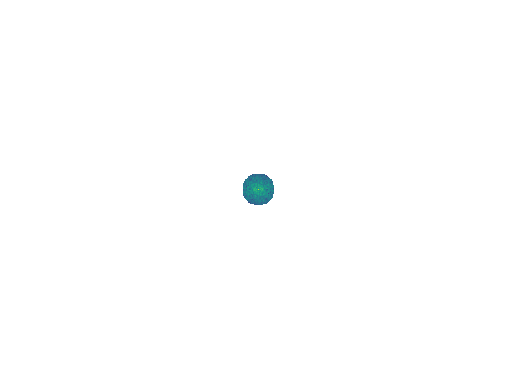

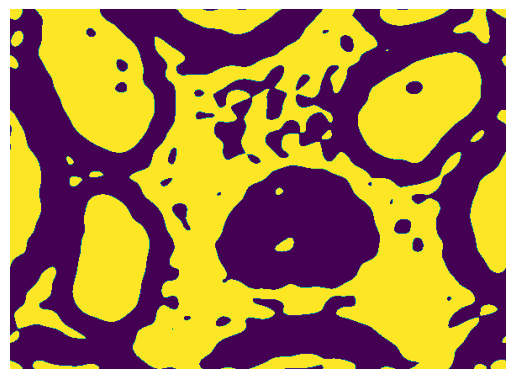

In [ ]:
filtrada = filtro_variabilidad(img_mapa, 20, 0)

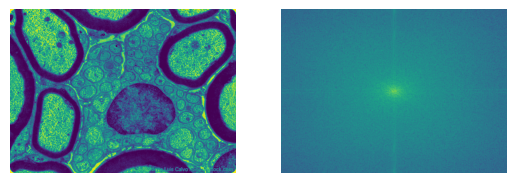

<ipython-input-6-d9659ffa2f88>:23: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(filtrada)))


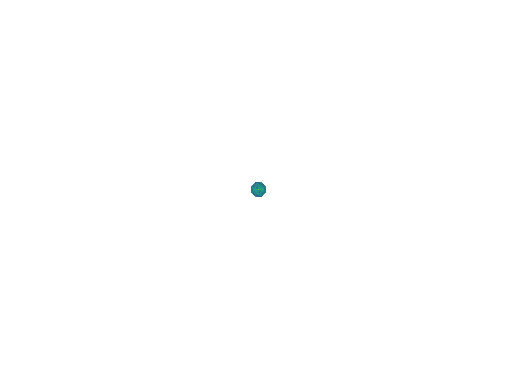

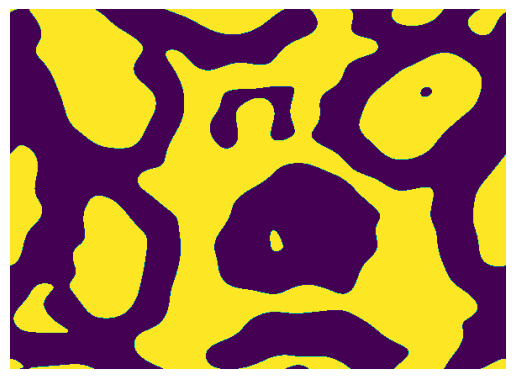

In [ ]:
filtrada = filtro_variabilidad(img_mapa, 10, 0)

Mapas de variabilidad

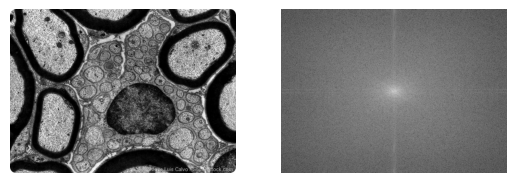

<ipython-input-82-d9659ffa2f88>:23: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(filtrada)))


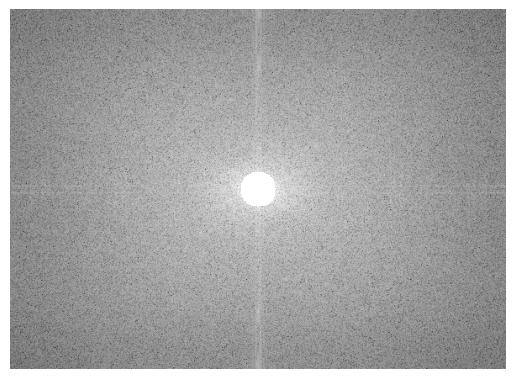

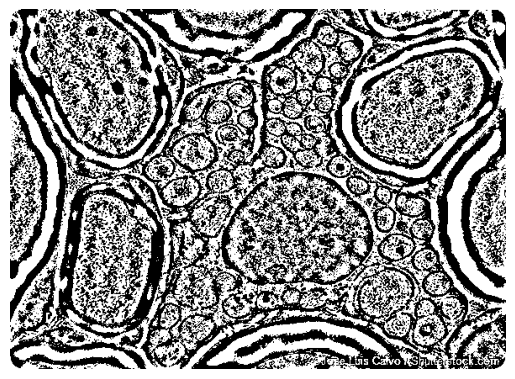

In [ ]:
filtrada = filtro_variabilidad(img_mapa, 20, 1)

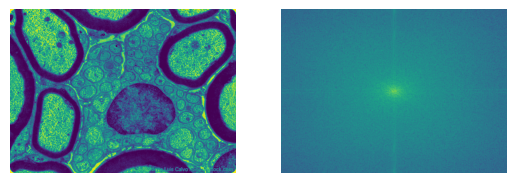

<ipython-input-6-d9659ffa2f88>:23: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(filtrada)))


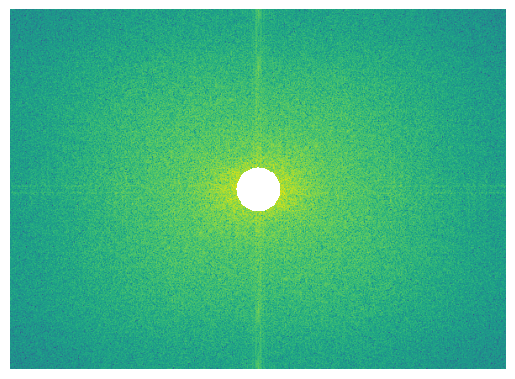

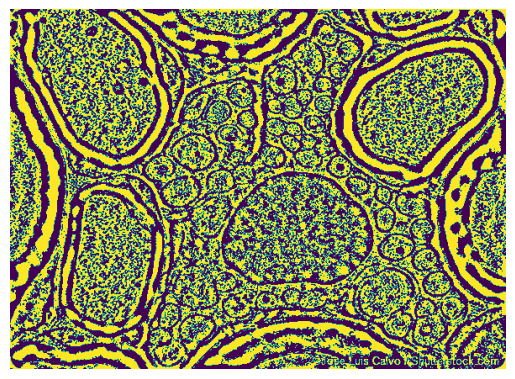

In [ ]:
filtrada = filtro_variabilidad(img_mapa, 25, 1)